# **df3 - Preprocessing**

# **Fraudulent Claims Dataset**

In [ ]:
########################################################################

# **1) Missing Values**

In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('/content/enhanced_insurance_claims_data.csv')

In [ ]:
df3.head()

Claim_ID  Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  2020-08-09   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b  2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6  2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd  2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   
1            0                       0                   1   
2            0                       0                   0   
3            0                       1                   0   
4            0                       1                   0   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  
0                   0        2021            7         19  
1                   0        2020            8          9  
2                   1        2020            4         21  
3                   0        2023            2         13  
4                   0        2021           11         15

In [ ]:
df3.isnull().sum()

Claim_ID                  0
Claim_Date                0
Policyholder_ID           0
Claim_Amount              0
Suspicious_Flags          0
Fraud_Label               0
Claim_Type_Home Damage    0
Claim_Type_Medical        0
Claim_Type_Vehicle        0
Claim_Year                0
Claim_Month               0
Claim_Day                 0
dtype: int64

# **No Missing Values Found**

# **If Missing Values have this Datasets.**

# **Step 1:**

check % of Missing Values if more than 70% Missing Values -> Delete that Columns

# **Step 2:**

Check this Columns have Normal Distribution and No Outliers - Use Mean Imputation

Else use Median Imputation

# **Step 3:**

Check that Columns Have Categorical Columns Use Mode

# **Step 4:**

If That Dataset have Times series Use Forward fill or Backward Fill

#**Step 5:**

If that Missing Values was Voluntarily Happen Based On Confidential else any other Situation

Client or SME or BA Give us Custom values fill us Cutom method to fill Missing Values

In [ ]:
########################################################################

# **2) Outliers**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

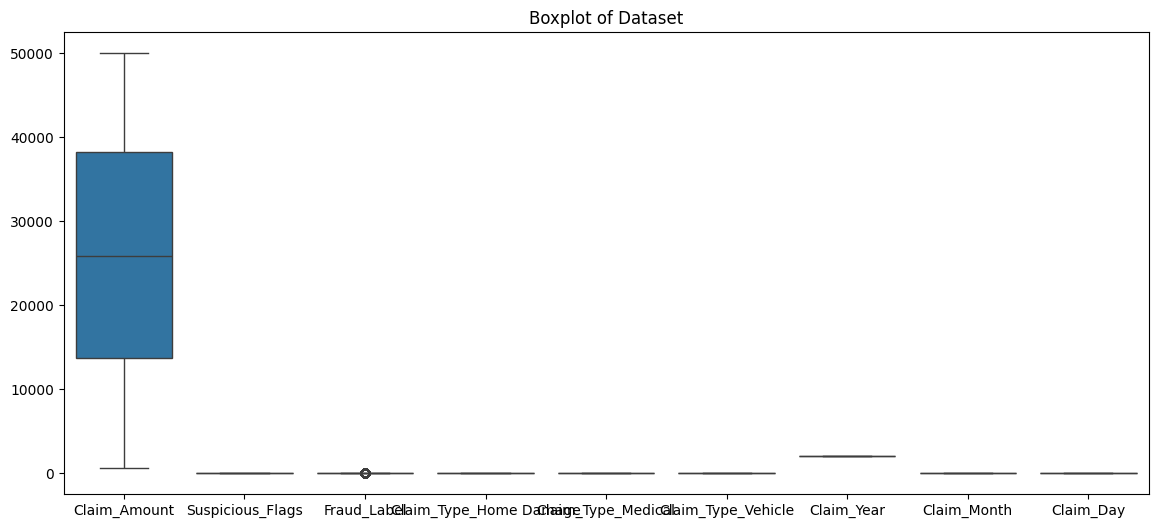

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=df3)
plt.title("Boxplot of Dataset")
plt.show()


In [ ]:

# Detect outliers using IQR for all numeric columns
outliers = {}

for col in df3.select_dtypes(include=['number']).columns:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)][col].tolist()

# Print outliers for each column
for col, out in outliers.items():
    print(f"Outliers in {col}: {out}")


Outliers in Claim_Amount: []
Outliers in Suspicious_Flags: []
Outliers in Fraud_Label: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in Claim_Type_Home Damage: []
Outliers in Claim_Type_Medical: []
Outliers in Claim_Type_Vehicle: []
Outliers in Claim_Year: []
Outliers in Claim_Month: []
Outliers in Claim_Day: []


# **No Outlier Found in this Datasets**

# **If Outlier Found in this Datasets:-**

# **Step 1: Understand the Outliers**



**Check Data Entry Errors:** Typos or incorrect values? Fix them if possible.

**Assess Context:** Are these extreme values realistic or expected in your data domain?

#**Step 2: Choose an Outlier Treatment Approach:**



#**1) Removal Methods:**

**Delete Outliers:** If they’re definitely errors or irrelevant.

df_clean = df1[~((df1['A'] < lower_bound) | (df1['A'] > upper_bound))]


#**2) Imputation Methods:**

**Replace with Mean/Median:** Works well when outliers aren’t extreme.

median = df1['A'].median()
df1['A'] = np.where((df1['A'] < lower_bound) | (df1['A'] > upper_bound), median, df1['A'])

**Use Mode:** For categorical data with outliers


#**3) Transformation Methods:**

**Log Transformation:** Reduces effect of right-skewed outliers.

df1['A_log'] = np.log1p(df1['A'])

**Square Root or Box-Cox:** For data with different types of skew.


#**4) Capping or Clipping**

**Winsorization:** Limit extreme values to percentiles.

from scipy.stats.mstats import winsorize
df1['A_winsorized'] = winsorize(df1['A'], limits=[0.05, 0.05])  # Caps at 5th & 95th percentile

**Cap at Boundaries:** Replace outliers with IQR bounds.

df1['A'] = np.clip(df1['A'], lower_bound, upper_bound)

In [ ]:
########################################################################

# **3) Feature Engineering**

# **( i ) Generate Claim-to-Income Ratio (Claim_Amount / Annual_Income) as a new feature.**

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from faker import Faker

# Assuming df3 is your DataFrame
# df3 = pd.read_csv('your_data.csv')

# Creating Annual_Income column using Faker
fake = Faker()
df3['Annual_Income'] = [fake.random_int(min=30000, max=200000) for _ in range(len(df3))]

# Generating Claim-to-Income Ratio as a new feature
df3['Claim_to_Income_Ratio'] = df3['Claim_Amount'] / df3['Annual_Income']


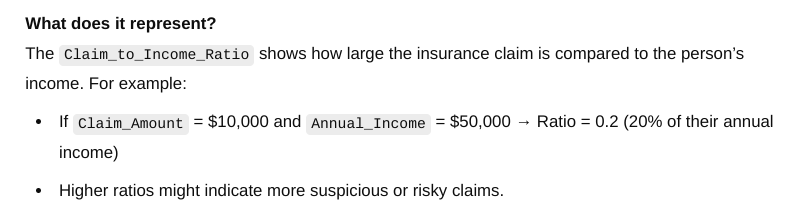

# **This feature is often useful for fraud detection because unusually high claim amounts relative to income can be a red flag**

# **Claim-to-Income Ratio Columns Created**

In [ ]:
df3.head()

Claim_ID  Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  2021-07-19   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  2020-08-09   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b  2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6  2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd  2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   
1            0                       0                   1   
2            0                       0                   0   
3            0                       1                   0   
4            0                       1                   0   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  Annual_Income  \
0                   0        2021            7         19         126531   
1                   0        2020            8          9         184130   
2                   1        2020            4         21          82529   
3                   0        2023            2         13         185307   
4                   0        2021           11         15          74026   

   Claim_to_Income_Ratio  
0               0.254101  
1               0.040228  
2               0.058203  
3               0.064848  
4               0.441322

# **( ii ) Identify claims filed within an unusually short period after policy issuance.**

# **create extra columns for**

**1) Policy Issues Date vs**

**2) claim date**

**3) difference of policy issues date vs claim data find ( short period time True or False type )**

# **eg: claims happens before of 365 days b/w of policy isses and claim date its True otherwise its false**


# **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np

# Randomly generating Policy Issuance Date with some realistic variation
df3['Policy_Issuance_Date'] = pd.to_datetime(df3['Claim_Date']) - pd.to_timedelta(np.random.randint(30, 1000, size=len(df3)), unit='D')

# Convert 'Claim_Date' to datetime objects before subtraction
df3['Claim_Date'] = pd.to_datetime(df3['Claim_Date'])

# Calculating days between policy issuance and claim date
df3['Days_Since_Issuance'] = (df3['Claim_Date'] - df3['Policy_Issuance_Date']).dt.days

# Flagging unusually short periods (e.g., within 30 days)
df3['Short_Period_Claim'] = df3['Days_Since_Issuance'] <= 365

In [ ]:
df3.head()

Claim_ID Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d 2021-07-19   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d 2020-08-09   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b 2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6 2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd 2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   
1            0                       0                   1   
2            0                       0                   0   
3            0                       1                   0   
4            0                       1                   0   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  Annual_Income  \
0                   0        2021            7         19         126531   
1                   0        2020            8          9         184130   
2                   1        2020            4         21          82529   
3                   0        2023            2         13         185307   
4                   0        2021           11         15          74026   

   Claim_to_Income_Ratio Policy_Issuance_Date  Days_Since_Issuance  \
0               0.254101           2020-11-21                  240   
1               0.040228           2019-08-03                  372   
2               0.058203           2017-08-23                  972   
3               0.064848           2022-03-02                  348   
4               0.441322           2020-12-10                  340   

   Short_Period_Claim  
0                True  
1               False  
2               False  
3                True  
4                True

# **Short_Period_Claim Consider as a Scam otherwise Genuine**

In [ ]:
df3['Short_Period_Claim'].value_counts()

Short_Period_Claim
False    651
True     349
Name: count, dtype: int64

In [ ]:
df3['Days_Since_Issuance'].value_counts()

Days_Since_Issuance
444    5
348    5
866    5
802    4
276    4
      ..
275    1
785    1
281    1
485    1
851    1
Name: count, Length: 629, dtype: int64

# **3) Anomaly Detection**

In [ ]:
df3.nunique()

Claim_ID                  1000
Claim_Date                 778
Policyholder_ID           1000
Claim_Amount              1000
Suspicious_Flags             2
Fraud_Label                  2
Claim_Type_Home Damage       2
Claim_Type_Medical           2
Claim_Type_Vehicle           2
Claim_Year                   6
Claim_Month                 12
Claim_Day                   31
Annual_Income              996
Claim_to_Income_Ratio     1000
Policy_Issuance_Date       800
Days_Since_Issuance        629
Short_Period_Claim           2
dtype: int64

In [ ]:
df3['Fraud_Label'].value_counts()

Fraud_Label
0    797
1    203
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
contamination_rate = df3['Fraud_Label'].mean()  # Assuming 1 is fraud and 0 is not
print(f"Contamination rate: {contamination_rate:.2f}")


Contamination rate: 0.20


# **Contamination rate: 0.20**

# **If No Labeled column in my dataset only use that time**

In [ ]:
# from scipy.stats import zscore

# numeric_cols = ['Claim_Amount', 'Claim_to_Income_Ratio', 'Days_Since_Issuance']
# z_scores = np.abs(zscore(df3[numeric_cols]))

# outliers = (z_scores > 3).any(axis=1)  # Threshold of 3 std deviations
# contamination_rate = np.mean(outliers)
# print(f"Estimated contamination rate: {contamination_rate:.2f}")


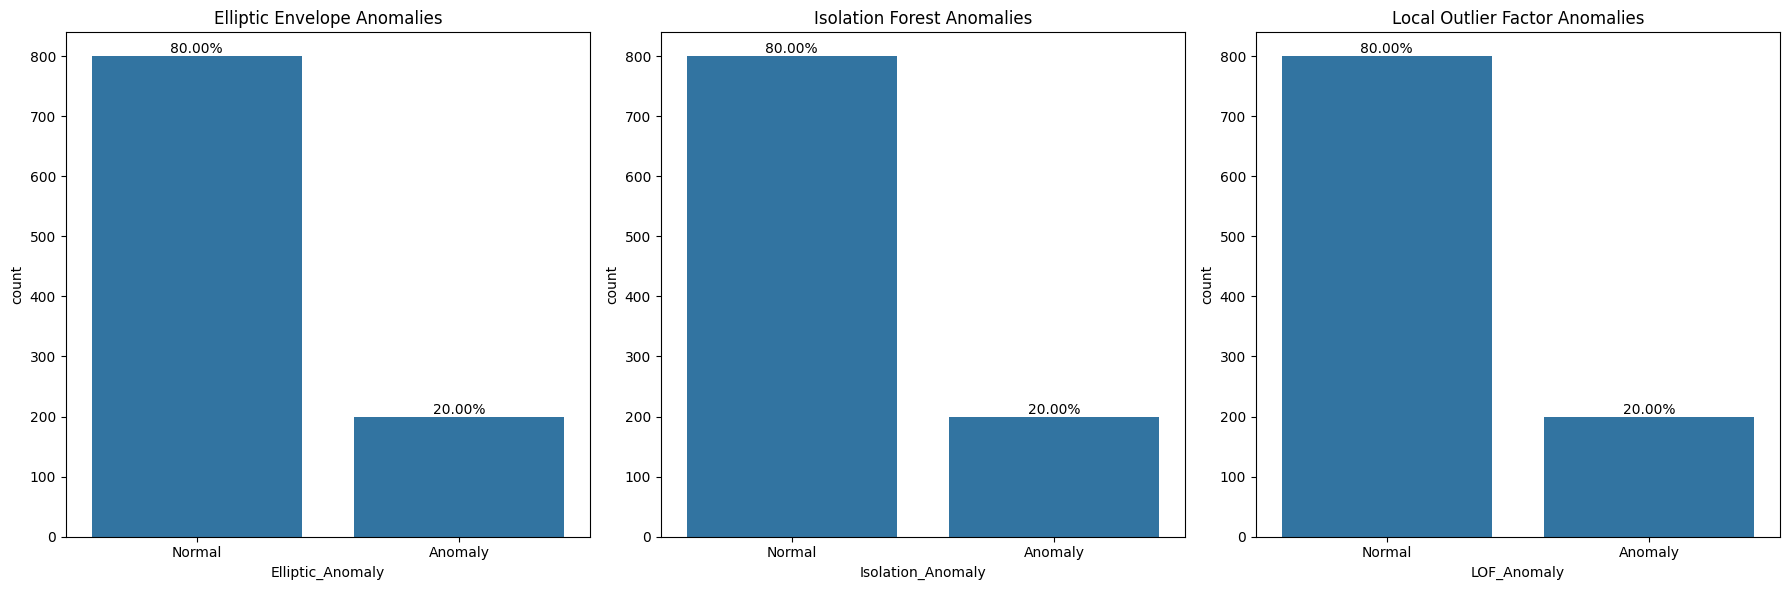

In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical columns for anomaly detection
X = df3[['Claim_Amount', 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Claim_to_Income_Ratio', 'Days_Since_Issuance']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.20)
df3['Elliptic_Anomaly'] = elliptic.fit_predict(X_scaled)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.20, random_state=42)
df3['Isolation_Anomaly'] = iso_forest.fit_predict(X_scaled)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.20)
df3['LOF_Anomaly'] = lof.fit_predict(X_scaled)

# Mapping results for better readability
anomaly_map = {-1: 'Anomaly', 1: 'Normal'}
df3['Elliptic_Anomaly'] = df3['Elliptic_Anomaly'].map(anomaly_map)
df3['Isolation_Anomaly'] = df3['Isolation_Anomaly'].map(anomaly_map)
df3['LOF_Anomaly'] = df3['LOF_Anomaly'].map(anomaly_map)

# Checking suspicious claims
suspicious_claims = df3[(df3['Elliptic_Anomaly'] == 'Anomaly') |
                        (df3['Isolation_Anomaly'] == 'Anomaly') |
                        (df3['LOF_Anomaly'] == 'Anomaly') |
                        (df3['Short_Period_Claim'])]

# Function to add percentage on bars
def add_percentage(ax):
    total = len(df3)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

# Visualizing results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = sns.countplot(x='Elliptic_Anomaly', data=df3, ax=axes[0])
ax1.set(title='Elliptic Envelope Anomalies')
add_percentage(ax1)

ax2 = sns.countplot(x='Isolation_Anomaly', data=df3, ax=axes[1])
ax2.set(title='Isolation Forest Anomalies')
add_percentage(ax2)

ax3 = sns.countplot(x='LOF_Anomaly', data=df3, ax=axes[2])
ax3.set(title='Local Outlier Factor Anomalies')
add_percentage(ax3)

plt.tight_layout()
plt.show()


# **Show Each dataset Status -: Normal vs Abnormal**

# **while applying Elliptic Envelope, Isolation Forest, and Local Outlier Factor (LOF)**

In [ ]:
###################################################################################################################

# **Isolation forest is Best for this data**

**Isolation Forest Consider Single Suspecius Activity as Frauds**

In [ ]:
####################################################################################################################

In [ ]:
suspicious_claims.head()

Claim_ID Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d 2021-07-19   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b 2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6 2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd 2021-11-15   
5  6142ea7d-17be-4111-9a2a-73ed562b0f79 2020-08-27   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   
5  43b7a3a6-9a8d-4a03-980d-7b71d8f56413      14270.44                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   
2            0                       0                   0   
3            0                       1                   0   
4            0                       1                   0   
5            0                       0                   1   

   Claim_Type_Vehicle  Claim_Year  Claim_Month  Claim_Day  Annual_Income  \
0                   0        2021            7         19         126531   
2                   1        2020            4         21          82529   
3                   0        2023            2         13         185307   
4                   0        2021           11         15          74026   
5                   0        2020            8         27          43354   

   Claim_to_Income_Ratio Policy_Issuance_Date  Days_Since_Issuance  \
0               0.254101           2020-11-21                  240   
2               0.058203           2017-08-23                  972   
3               0.064848           2022-03-02                  348   
4               0.441322           2020-12-10                  340   
5               0.329161           2018-08-01                  757   

   Short_Period_Claim Elliptic_Anomaly Isolation_Anomaly LOF_Anomaly  
0                True           Normal            Normal      Normal  
2               False           Normal           Anomaly     Anomaly  
3                True           Normal            Normal      Normal  
4                True          Anomaly            Normal      Normal  
5               False          Anomaly            Normal      Normal

In [ ]:
df3['LOF_Anomaly'].value_counts()

LOF_Anomaly
Normal     800
Anomaly    200
Name: count, dtype: int64

In [ ]:
df3['Elliptic_Anomaly'].value_counts()

Elliptic_Anomaly
Normal     800
Anomaly    200
Name: count, dtype: int64

In [ ]:
df3['Isolation_Anomaly'].value_counts()

Isolation_Anomaly
Normal     800
Anomaly    200
Name: count, dtype: int64

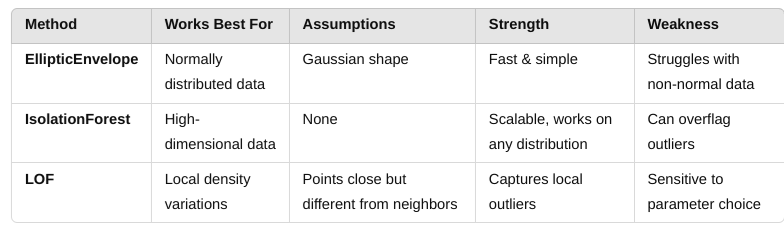

In [ ]:
################################################################################################

# **Which one to choose?**

If your data looks like a **normal distribution** → Go with **EllipticEnvelope**

If your data has **many dimensions or is complex** → Use **IsolationForest**

If you **suspect localized anomalies** (outliers in dense clusters) → LOF is your best bet

# **For your insurance fraud detection:**

**IsolationForest** is probably your best starting point — your data likely has **high dimensionality and complex patterns**.

**LOF** could be **great too if fraud cases show subtle**, local differences from non-fraudulent ones.

**EllipticEnvelope** would **only work well if your data is normally distributed** — which is rare in fraud detection.

In [ ]:
#################################################################################################

# **Machine Learning Area**

# **4) Fraud Score Calculation**

**Assign a fraud probability score (0-1) using ensemble models (Random Forest + Neural Networks)**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-26-7b50c310ce12>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Fraud_Probability_Score'].fillna(0, inplace=True)


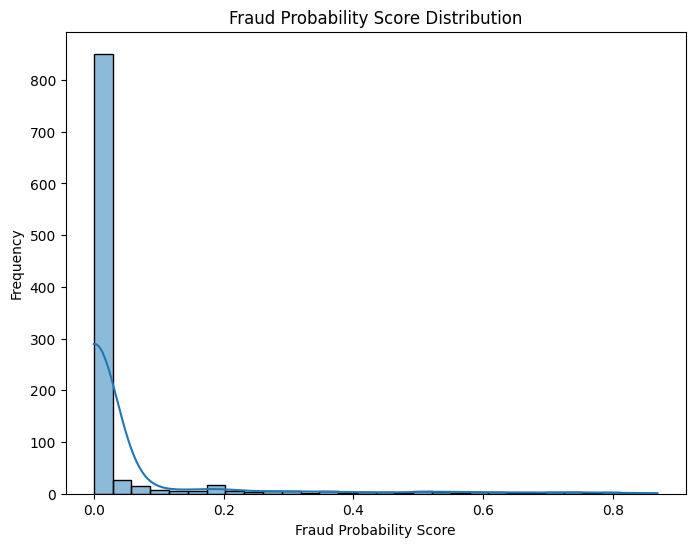

In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Selecting relevant numerical columns for anomaly detection
X = df3[['Claim_Amount', 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Claim_to_Income_Ratio', 'Days_Since_Issuance']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X_scaled, df3['Fraud_Label'], df3.index, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_probs = nn_model.predict_proba(X_test)[:, 1]

# Averaging predictions to get an ensemble fraud probability score
df3.loc[test_index, 'Fraud_Probability_Score'] = (rf_probs + nn_probs) / 2

# Filling NaN values with 0 for rows not in the test set
df3['Fraud_Probability_Score'].fillna(0, inplace=True)

# Visualizing fraud probability distribution
plt.figure(figsize=(8, 6))
sns.histplot(df3['Fraud_Probability_Score'].dropna(), bins=30, kde=True)
plt.title('Fraud Probability Score Distribution')
plt.xlabel('Fraud Probability Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df3['Fraud_Probability_Score']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
995    0.148099
996    0.000000
997    0.000000
998    0.614191
999    0.000000
Name: Fraud_Probability_Score, Length: 1000, dtype: float64

In [ ]:
df3.head()

Claim_ID Claim_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d 2021-07-19   
1  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d 2020-08-09   
2  9a1de644-815e-46d1-bb8f-aa1837f8a88b 2020-04-21   
3  72ff5d2a-386e-4be0-ab65-a6a48b8148f6 2023-02-13   
4  6c307511-b2b9-437a-a8df-6ec4ce4a2bbd 2021-11-15   

                        Policyholder_ID  Claim_Amount  Suspicious_Flags  \
0  1a3d1fa7-bc89-40a9-a3b8-c1e9392456de      32151.63                 0   
1  17fc695a-07a0-4a6e-8822-e8f36c031199       7407.13                 0   
2  b38a088c-a65e-4389-b74d-0fb132e70629       4803.47                 1   
3  c241330b-01a9-471f-9e8a-774bcf36d58b      12016.71                 1   
4  c37459ee-f50b-4a63-b71e-cd7b27cd8130      32669.28                 0   

   Fraud_Label  Claim_Type_Home Damage  Claim_Type_Medical  \
0            0                       0                   1   
1            0                       0                   1   
2            0                       0                   0   
3            0                       1                   0   
4            0                       1                   0   

   Claim_Type_Vehicle  Claim_Year  ...  Claim_Day  Annual_Income  \
0                   0        2021  ...         19         126531   
1                   0        2020  ...          9         184130   
2                   1        2020  ...         21          82529   
3                   0        2023  ...         13         185307   
4                   0        2021  ...         15          74026   

   Claim_to_Income_Ratio  Policy_Issuance_Date Days_Since_Issuance  \
0               0.254101            2020-11-21                 240   
1               0.040228            2019-08-03                 372   
2               0.058203            2017-08-23                 972   
3               0.064848            2022-03-02                 348   
4               0.441322            2020-12-10                 340   

   Short_Period_Claim  Elliptic_Anomaly Isolation_Anomaly LOF_Anomaly  \
0                True            Normal            Normal      Normal   
1               False            Normal            Normal      Normal   
2               False            Normal           Anomaly     Anomaly   
3                True            Normal            Normal      Normal   
4                True           Anomaly            Normal      Normal   

  Fraud_Probability_Score  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 21 columns]

In [ ]:
df3['Fraud_Probability_Score'].value_counts()

Fraud_Probability_Score
0.000000    800
0.727842      1
0.513845      1
0.135467      1
0.106245      1
           ... 
0.107329      1
0.361100      1
0.197159      1
0.175828      1
0.195443      1
Name: count, Length: 201, dtype: int64

# **Whatis Ensemble ?**

# **a machine learning technique that combines multiple models to make better predictions**

**Combine models:** Multiple models, such as neural networks or regression models, are combined to create an ensemble model.

**Improve predictions:** The ensemble model produces more accurate predictions than a single model.

**Learn from mistakes:** Some techniques, like boosting, learn from previous mistakes to improve predictions.

In [ ]:
df3.nunique()

Claim_ID                   1000
Claim_Date                  778
Policyholder_ID            1000
Claim_Amount               1000
Suspicious_Flags              2
Fraud_Label                   2
Claim_Type_Home Damage        2
Claim_Type_Medical            2
Claim_Type_Vehicle            2
Claim_Year                    6
Claim_Month                  12
Claim_Day                    31
Annual_Income               996
Claim_to_Income_Ratio      1000
Policy_Issuance_Date        800
Days_Since_Issuance         629
Short_Period_Claim            2
Elliptic_Anomaly              2
Isolation_Anomaly             2
LOF_Anomaly                   2
Fraud_Probability_Score     201
dtype: int64

# **Important Features**

In [ ]:
df3.columns

Index(['Claim_ID', 'Claim_Date', 'Policyholder_ID', 'Claim_Amount',
       'Suspicious_Flags', 'Fraud_Label', 'Claim_Type_Home Damage',
       'Claim_Type_Medical', 'Claim_Type_Vehicle', 'Claim_Year', 'Claim_Month',
       'Claim_Day', 'Annual_Income', 'Claim_to_Income_Ratio',
       'Policy_Issuance_Date', 'Days_Since_Issuance', 'Short_Period_Claim',
       'Elliptic_Anomaly', 'Isolation_Anomaly', 'LOF_Anomaly',
       'Fraud_Probability_Score'],
      dtype='object')

# **important Columns:-**

In [ ]:
#  'Claim_Amount', 'Suspicious_Flags', 'Fraud_Label', 'Year', 'Month', 'Day',
# 'Annual_Income', 'Claim_to_Income_Ratio', 'Claim_Date','Policy_Issuance_Date', 'Days_Since_Issuance', 'Short_Period_Claim',
# 'Isolation_Anomaly','Fraud_Probability_Score', 'Claim_Type_Medical', 'Claim_Type_Vehicle'

In [ ]:
df3.to_csv('df3_preprocessed.csv')